In [1]:
BASE = "../analysis/resistome/"
OUT  = "../analysis/"

import os
os.makedirs(OUT, exist_ok=True)

In [2]:
import glob
import os
import pandas as pd

archivos = glob.glob(BASE + "V_*_amrfinder.tsv")

dfs = []

for f in archivos:
    df = pd.read_csv(f, sep="\t")
    especie = os.path.basename(f).replace("_amrfinder.tsv", "")
    df["Species"] = especie   # ← AQUÍ agregamos la columna clave
    dfs.append(df)

amr = pd.concat(dfs, ignore_index=True)

amr.head()

,Protein id,Contig id,Start,Stop,Strand,Element symbol,Element name,Scope,Type,Subtype,...,Target length,Reference sequence length,% Coverage of reference,% Identity to reference,Alignment length,Closest reference accession,Closest reference name,HMM accession,HMM description,Species
0,NaN,NZ_CP026041.1,2639419,2641017,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.81,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
1,NaN,NZ_CP026041.1,3109082,3109543,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus
2,NaN,NZ_CP026042.1,967271,968119,+,blaCARB-30,carbenicillin-hydrolyzing class A beta-lactama...,core,AMR,AMR,...,283,283,100.0,100.00,283,WP_005498292.1,carbenicillin-hydrolyzing class A beta-lactama...,NaN,NaN,V_parahaemolyticus
3,NaN,NZ_CP009982.1,2081630,2083228,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.25,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
4,NaN,NZ_CP009982.1,2553486,2553947,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus


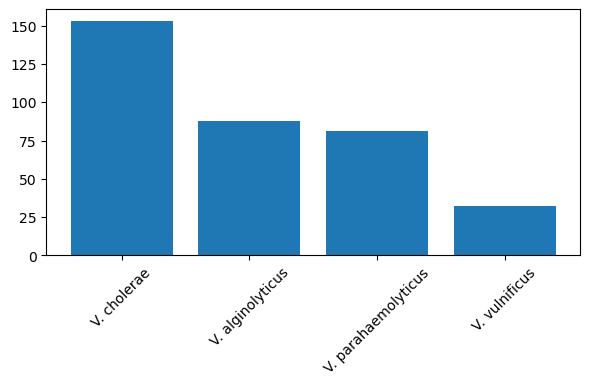

In [3]:
import matplotlib.pyplot as plt

totales = {
    "V. cholerae": 153,
    "V. alginolyticus": 88,
    "V. parahaemolyticus": 81,
    "V. vulnificus": 32
}

plt.figure(figsize=(6,4))
plt.bar(totales.keys(), totales.values())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(OUT + "resistome_genes_totales.png", dpi=300)
plt.show()

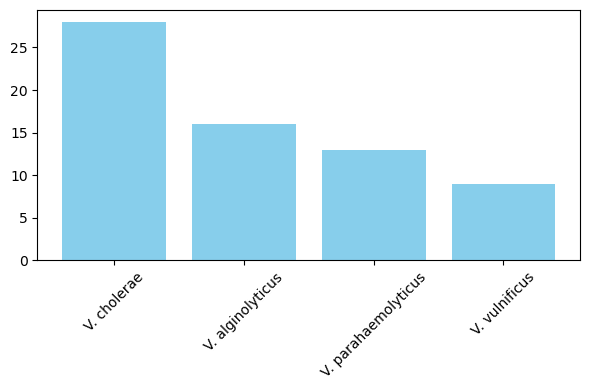

In [4]:
unicos = {
    "V. cholerae": 28,
    "V. alginolyticus": 16,
    "V. parahaemolyticus": 13,
    "V. vulnificus": 9
}

plt.figure(figsize=(6,4))
plt.bar(unicos.keys(), unicos.values(), color = 'skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(OUT + "resistome_genes_unicos.png", dpi=300)
plt.show()

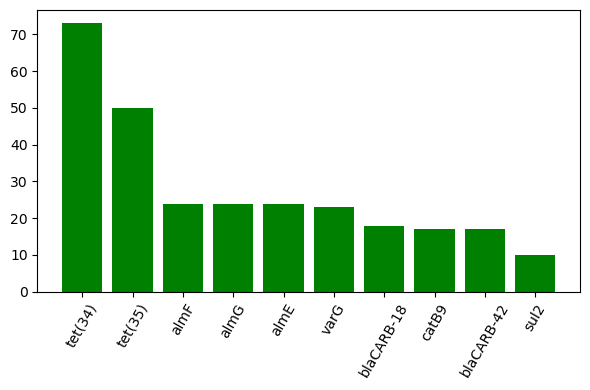

In [5]:
top = (
    amr["Element symbol"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(6,4))
plt.bar(top.index, top.values, color = 'green')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig(OUT + "resistome_top_genes.png", dpi=300)
plt.show()

In [6]:
tabla = pd.crosstab(
    amr["Species"],
    amr["Element symbol"]
)

matriz = (tabla > 0).astype(int)

matriz.to_csv(OUT + "matriz_presencia_ausencia_amr.csv")

matriz.head()

Element symbol,aac(3)-IId,aac(3)-IIe,aadA16,aadA2,almE,almF,almG,aph(3'')-Ib,aph(3')-Ia,aph(6)-Id,...,qnrVC5,sul1,sul2,tet(34),tet(35),tet(59),tet(A),tet(B),tet(D),varG
Species,,,,,,,,,,,,,,,,,,,,,
V_alginolyticus,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
V_cholerae,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,1,0,1,1
V_parahaemolyticus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,1,1,0,1,0,0
V_vulnificus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,1,1,0,0,0


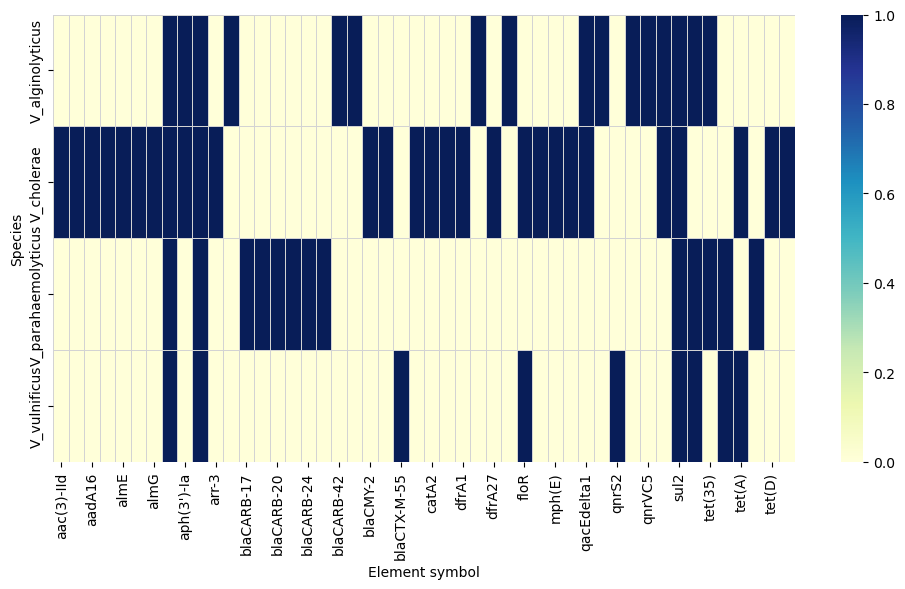

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(matriz, cmap="YlGnBu", linewidths=0.5, linecolor="lightgray")
plt.tight_layout()
plt.savefig(OUT + "heatmap_resistoma.png", dpi=300)
plt.show()

<Axes: xlabel='Element symbol', ylabel='Species'>

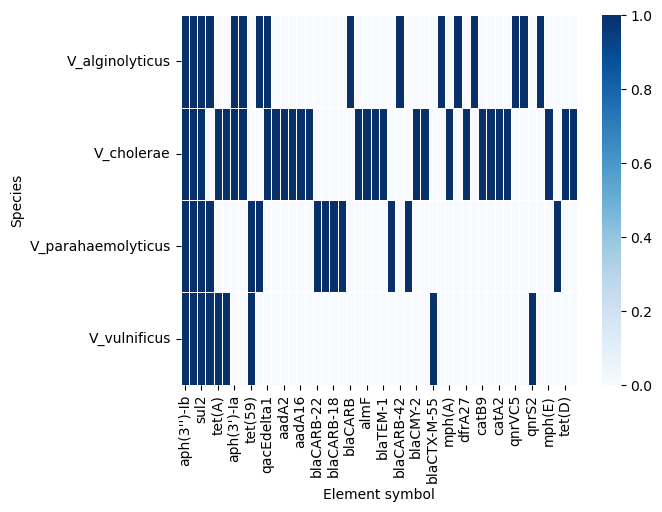

In [8]:
orden = matriz.sum(axis=0).sort_values(ascending=False).index
matriz_ord = matriz[orden]

sns.heatmap(matriz_ord, cmap="Blues", linewidths=0.5)